In [2]:
import datetime
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

In [14]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [121]:
df_train.head()

,EmployeeNo,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not,Division_encoded,Qualification_encoded,Gender_encoded,Channel_of_Recruitment_encoded,State_Of_Origin_encoded,Foreign_schooled_encoded,Marital_Status_encoded,Past_Disciplinary_Action_encoded,Previous_IntraDepartmental_Movement_encoded,No_of_previous_employers_encoded,age,no_of_years_in_the_company
0,YAK/S/00001,2,12.5,1,0,41,0,1,1,0,1,3,0,0,0,0,0,33,8
1,YAK/S/00002,2,12.5,0,0,52,0,2,0,1,0,3,1,0,0,0,0,28,4
2,YAK/S/00003,2,7.5,0,0,42,0,1,0,1,1,20,1,0,0,0,0,32,7
3,YAK/S/00004,3,2.5,0,0,42,0,1,0,1,0,26,1,2,0,0,1,37,10
4,YAK/S/00006,3,7.5,0,0,77,0,4,0,1,1,2,1,0,0,0,1,29,7


In [100]:
null_col_list = [
    col for col in df_train.columns if df_train[col].isnull().sum() > 0 
]

null_col_list


['Qualification']

In [101]:
df_train['Qualification'].unique()

array(['MSc, MBA and PhD', 'First Degree or HND', nan,
       'Non-University Education'], dtype=object)

In [4]:
cat_col = [col for col in df_train.columns if df_train[col].dtype == "O" and col != "EmployeeNo"]

cat_col

['Division',
 'Qualification',
 'Gender',
 'Channel_of_Recruitment',
 'State_Of_Origin',
 'Foreign_schooled',
 'Marital_Status',
 'Past_Disciplinary_Action',
 'Previous_IntraDepartmental_Movement',
 'No_of_previous_employers']

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not', 'Division_encoded', 'Qualification_encoded',
       'Gender_encoded', 'Channel_of_Recruitment_encoded',
       'State_Of_Origin_encoded', 'Foreign_schooled_encoded',
       'Marital_Status_encoded', 'Past_Disciplinary_Action_encoded',
       'Previous_IntraDepartmental_Movement_encoded',
       'No_of_previous_employers_encoded'],
      dtype='object')

In [23]:
null_test_df = [
    col for col in df_test.columns if df_test[col].isnull().sum() > 0
]

null_test_df

['Qualification']

In [24]:
df_test['Qualification'].unique()

array(['First Degree or HND', nan, 'MSc, MBA and PhD',
       'Non-University Education'], dtype=object)

In [6]:
def encode_columns(train_df, test_df, columns):
    encoders = {}
    for column in columns:
        encoder = LabelEncoder()
        train_df[column + '_encoded'] = encoder.fit_transform(train_df[column])
        test_df[column + '_encoded'] = test_df[column].apply(lambda x: encoder.transform([x])[0] if x in encoder.classes_ else -1)
        encoders[column] = encoder
    print(f"encoder {encoder}")
    print(encoders)
    return train_df, test_df, encoders


# col_to_encode = ['State_Of_Origin', 'Division', 'Channel_of_Recruitment', "Gender"]

df_train, df_test, encoders = encode_columns(df_train, df_test, cat_col)


encoder LabelEncoder()
{'Division': LabelEncoder(), 'Qualification': LabelEncoder(), 'Gender': LabelEncoder(), 'Channel_of_Recruitment': LabelEncoder(), 'State_Of_Origin': LabelEncoder(), 'Foreign_schooled': LabelEncoder(), 'Marital_Status': LabelEncoder(), 'Past_Disciplinary_Action': LabelEncoder(), 'Previous_IntraDepartmental_Movement': LabelEncoder(), 'No_of_previous_employers': LabelEncoder()}


In [9]:
import joblib

def encode_columns(train_df, columns):
    encoders = {}
    for column in columns:
        encoder = LabelEncoder()
        train_df[column + '_encoded'] = encoder.fit_transform(train_df[column])
        encoders[column] = encoder
    joblib.dump(encoders, 'encoding.joblib')
    return train_df, encoders


encode_columns(df_train, cat_col)

(        EmployeeNo                                     Division  \
 0      YAK/S/00001               Commercial Sales and Marketing   
 1      YAK/S/00002        Customer Support and Field Operations   
 2      YAK/S/00003               Commercial Sales and Marketing   
 3      YAK/S/00004               Commercial Sales and Marketing   
 4      YAK/S/00006                     Information and Strategy   
 ...            ...                                          ...   
 38307  YAK/S/54802  Information Technology and Solution Support   
 38308  YAK/S/54805        Customer Support and Field Operations   
 38309  YAK/S/54806                     Information and Strategy   
 38310  YAK/S/54807               Commercial Sales and Marketing   
 38311  YAK/S/54808                         People/HR Management   
 
              Qualification  Gender   Channel_of_Recruitment  \
 0         MSc, MBA and PhD  Female  Direct Internal process   
 1      First Degree or HND    Male        Agency and 

In [103]:
df_train.drop(columns=cat_col, inplace=True)
df_test.drop(columns=cat_col, inplace=True)

In [106]:


def calculate_years(year):

    year = datetime.datetime.strptime(str(year), "%Y")

    age = datetime.datetime.strptime(str("2019"), "%Y") - year

    age =  age.days // 365

    return age

In [107]:
df_train['age'] = df_train['Year_of_birth'].apply(calculate_years)
df_train['no_of_years_in_the_company'] = df_train['Year_of_recruitment'].apply(calculate_years)

df_test['age'] = df_test['Year_of_birth'].apply(calculate_years)
df_test['no_of_years_in_the_company'] = df_test['Year_of_recruitment'].apply(calculate_years)



In [108]:
df_train.drop(columns=['Year_of_birth', 'Year_of_recruitment'], inplace=True)
df_test.drop(columns=['Year_of_birth', 'Year_of_recruitment'], inplace=True)

In [110]:
# df_test['Previous_IntraDepartmental_Movement'].unique()

In [46]:
df_test.dtypes

EmployeeNo                                      object
Qualification                                    int64
Trainings_Attended                               int64
Year_of_birth                                    int64
Last_performance_score                         float64
Year_of_recruitment                              int64
Targets_met                                      int64
Previous_Award                                   int64
Training_score_average                           int64
Foreign_schooled                                 int64
Marital_Status                                   int64
Past_Disciplinary_Action                         int64
Previous_IntraDepartmental_Movement              int64
No_of_previous_employers                         int64
Division_encoded                                 int64
Qualification_encoded                            int64
Gender_encoded                                   int64
Channel_of_Recruitment_encoded                   int64
State_Of_O

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7015
           1       0.43      0.42      0.42       648

    accuracy                           0.90      7663
   macro avg       0.69      0.68      0.68      7663
weighted avg       0.90      0.90      0.90      7663

Accuracy: 0.9030405846274305
Confusion Matrix:
[[6650  365]
 [ 378  270]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7015
           1       0.43      0.42      0.42       648

    accuracy                           0.90      7663
   macro avg       0.69      0.68      0.68      7663
weighted avg       0.90      0.90      0.90      7663

F1 Score: 0.4208885424785659
Precision: 0.4251968503937008
Recall: 0.4166666666666667
AUC: 0.8569099064614626


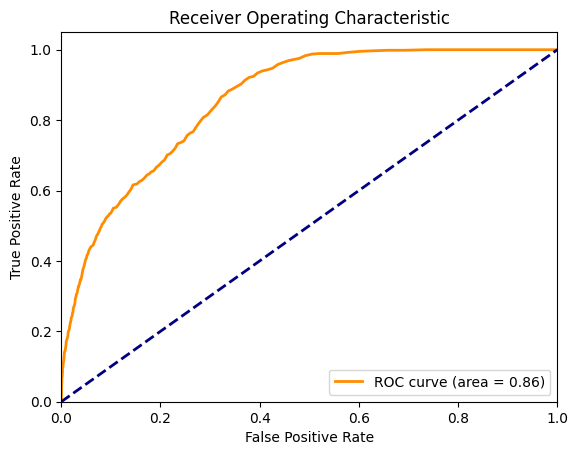

In [111]:
X = df_train.drop(columns=['EmployeeNo', "Promoted_or_Not"], axis = 1)
y = df_train['Promoted_or_Not']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=33
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Resample the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Define the model and parameter grid
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=5)
grid_search.fit(X_resampled, y_resampled)
best_model = grid_search.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))




Accuracy: 0.9030405846274305
Confusion Matrix:
[[6650  365]
 [ 378  270]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7015
           1       0.43      0.42      0.42       648

    accuracy                           0.90      7663
   macro avg       0.69      0.68      0.68      7663
weighted avg       0.90      0.90      0.90      7663

F1 Score: 0.42
Precision: 0.43
Recall: 0.42
AUC: 0.86


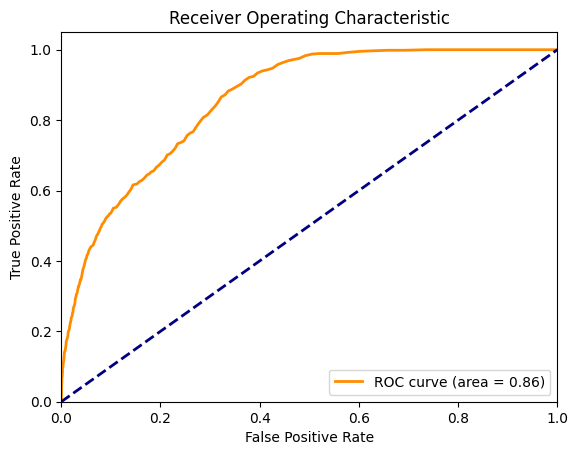

In [112]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
f1 = round(f1_score(y_test, y_pred), 2)
precision = round(precision_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred), 2)
auc = round(roc_auc_score(y_test, y_pred_proba),2)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC: {auc}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [113]:
df_test.columns

Index(['EmployeeNo', 'Trainings_Attended', 'Last_performance_score',
       'Targets_met', 'Previous_Award', 'Training_score_average',
       'Division_encoded', 'Qualification_encoded', 'Gender_encoded',
       'Channel_of_Recruitment_encoded', 'State_Of_Origin_encoded',
       'Foreign_schooled_encoded', 'Marital_Status_encoded',
       'Past_Disciplinary_Action_encoded',
       'Previous_IntraDepartmental_Movement_encoded',
       'No_of_previous_employers_encoded', 'age',
       'no_of_years_in_the_company'],
      dtype='object')

In [114]:
df_test.head(5)

,EmployeeNo,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Division_encoded,Qualification_encoded,Gender_encoded,Channel_of_Recruitment_encoded,State_Of_Origin_encoded,Foreign_schooled_encoded,Marital_Status_encoded,Past_Disciplinary_Action_encoded,Previous_IntraDepartmental_Movement_encoded,No_of_previous_employers_encoded,age,no_of_years_in_the_company
0,YAK/S/00005,2,7.5,0,0,65,3,0,1,0,14,1,0,0,0,1,43,2
1,YAK/S/00011,2,0.0,0,0,69,3,-1,1,1,27,1,0,0,0,1,28,1
2,YAK/S/00015,2,7.5,0,0,76,7,1,1,1,19,1,0,0,0,1,35,7
3,YAK/S/00016,2,2.5,0,0,52,2,0,1,0,32,0,2,0,0,1,35,10
4,YAK/S/00017,2,7.5,1,0,69,3,0,1,0,14,1,0,0,0,0,36,5


In [117]:


y_pred_test = best_model.predict(df_test.drop(columns=['EmployeeNo'], axis = 1))
y_pred_proba = best_model.predict_proba(df_test.drop(columns=['EmployeeNo'], axis= 1))[:, 1]

In [118]:
df_test['prediction'] = y_pred_test
df_test['predict_prob'] = y_pred_proba

In [119]:
df_test[['EmployeeNo', 'prediction', 'predict_prob']]

,EmployeeNo,prediction,predict_prob
0,YAK/S/00005,0,0.220
1,YAK/S/00011,0,0.075
2,YAK/S/00015,0,0.125
3,YAK/S/00016,0,0.025
4,YAK/S/00017,1,0.615
...,...,...,...
16491,YAK/S/54797,1,0.685
16492,YAK/S/54798,0,0.420
16493,YAK/S/54800,1,0.745
16494,YAK/S/54803,0,0.000


In [120]:
df_test[df_test['prediction'] == 1]

,EmployeeNo,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Division_encoded,Qualification_encoded,Gender_encoded,Channel_of_Recruitment_encoded,State_Of_Origin_encoded,Foreign_schooled_encoded,Marital_Status_encoded,Past_Disciplinary_Action_encoded,Previous_IntraDepartmental_Movement_encoded,No_of_previous_employers_encoded,age,no_of_years_in_the_company,prediction,predict_prob
4,YAK/S/00017,2,7.5,1,0,69,3,0,1,0,14,1,0,0,0,0,36,5,1,0.615
22,YAK/S/00063,2,0.0,1,0,72,4,0,0,0,30,1,0,0,0,0,26,1,1,0.810
26,YAK/S/00080,2,7.5,0,0,50,1,0,1,1,16,1,0,0,0,0,28,3,1,0.535
32,YAK/S/00099,2,7.5,1,0,44,1,0,1,0,19,1,0,0,0,1,39,12,1,0.785
36,YAK/S/00114,2,7.5,1,0,82,1,0,0,0,32,0,0,0,0,1,38,2,1,0.855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16412,YAK/S/54539,2,0.0,0,0,52,0,0,1,0,8,0,0,0,0,1,27,1,1,0.520
16419,YAK/S/54563,2,2.5,0,0,54,0,0,1,0,3,1,0,0,0,0,24,3,1,0.565
16446,YAK/S/54669,2,7.5,1,0,41,1,0,0,0,20,1,0,0,0,1,27,3,1,0.765
16491,YAK/S/54797,2,7.5,0,0,52,1,1,1,0,31,1,0,0,0,1,32,7,1,0.685


In [15]:
df_test.loc[1, :].to_dict()

{'EmployeeNo': 'YAK/S/00011',
 'Division': 'Information Technology and Solution Support',
 'Qualification': nan,
 'Gender': 'Male',
 'Channel_of_Recruitment': 'Direct Internal process',
 'Trainings_Attended': 2,
 'Year_of_birth': 1991,
 'Last_performance_score': 0.0,
 'Year_of_recruitment': 2018,
 'Targets_met': 0,
 'Previous_Award': 0,
 'Training_score_average': 69,
 'State_Of_Origin': 'OGUN',
 'Foreign_schooled': 'Yes',
 'Marital_Status': 'Married',
 'Past_Disciplinary_Action': 'No',
 'Previous_IntraDepartmental_Movement': 'No',
 'No_of_previous_employers': '1'}